In [1]:
## Import libraries
import numpy as np
import pandas as pd
import matplotlib as mpl; import matplotlib.pyplot as plt; from matplotlib import cm
import seaborn as sns
from datetime import datetime

mpl.rc('xtick', labelsize=20) 
mpl.rc('ytick', labelsize=20) 

# Add this to python2 code to make life easier
from __future__ import absolute_import, division, print_function

## Read the JSON data:

In [2]:
df = pd.read_json('data_analysis.json') #Read it as a pandas dataframe

In [3]:
df.head(3)

,address,category_code,city,headcount,name,phone,revenue,state,time_in_business,zip
0,10085 SCRIPPS RANCH CT STE A,44420000,SAN DIEGO,50 to 99,AMD CUSTOM,3123628000,$20 to 50 Million,CA,10+ years,92131
1,2566 SHALLOWFORD RD NE STE 104 # 302,31490000,ATLANTA,1 to 4,Real Hope Real Estate Inc,None,"Less Than $500,000",GA,10+ years,30345
2,212 E MAIN ST,53120000,NEOSHO,1 to 4,Jimmy Sexton Photography,4046331779,"Less Than $500,000",MO,10+ years,64850


## Exploratory analysis:

- **name**: The name of the business
- **address**: The street address of the business
- **city**: The city the business is in
- **zip**: The businesses zip code
- **time_in_business**: The years the company has been in business
- **phone**: The businesses phone number
- **category_code**: The [NAICS](https://classcodes.com/naics-code-list/) code for the business
- **headcount**: The number of people employed by the business
- **revenue**: The revenue (in thousands) of the business

## GOALS:
1. **Fill Rate**: For each field, how many records have a value.
2. **True-Valued Fill Rate**: For each field, how many records have *relevant* data in them. For example, a field which has string valued entries may have elements that contain something like `' '`. This is a string but may not be 'good' data depending on the field.
3. **Cardinality**: The cardinality of each field.
4. **Something interesting**: Find something cool or odd in the data set and tell us about it.

## 1. Fill Rate
For each field, how many records have a value.

In [4]:
total = len(df)
cols = df.columns

for i in range(len(df.columns)):
    print(cols[i], ':', df[cols[i]].dropna().count(), 'recorded values out of', total,
          'corresponding to', df[cols[i]].dropna().count()/total*100, '%')

address : 999986 recorded values out of 1000000 corresponding to 99.9986 %
category_code : 999986 recorded values out of 1000000 corresponding to 99.9986 %
city : 999986 recorded values out of 1000000 corresponding to 99.9986 %
headcount : 962352 recorded values out of 1000000 corresponding to 96.2352 %
name : 999986 recorded values out of 1000000 corresponding to 99.9986 %
phone : 590889 recorded values out of 1000000 corresponding to 59.0889 %
revenue : 943092 recorded values out of 1000000 corresponding to 94.3092 %
state : 999986 recorded values out of 1000000 corresponding to 99.9986 %
time_in_business : 916125 recorded values out of 1000000 corresponding to 91.6125 %
zip : 999988 recorded values out of 1000000 corresponding to 99.9988 %


## 2. True-Valued Fill Rate
For each field, how many records have *relevant* data in them. For example, a field which has string valued entries may have elements that contain something like `' '`. This is a string but may not be 'good' data depending on the field.

In [5]:
df['state'].dropna().unique()

array(['CA', 'GA', 'MO', 'OH', 'AL', 'MI', 'ME', 'FL', 'NM', 'HI', 'IN',
       'NY', 'IA', 'KS', 'MD', 'NJ', 'VA', 'DC', 'OR', 'NC', 'TX', 'PA',
       'ID', 'WA', 'UT', 'TN', 'MA', 'CT', 'CO', 'AZ', 'MS', 'OK', 'KY',
       'LA', 'MN', 'ND', 'WV', 'WI', 'SC', 'NH', 'IL', 'MT', 'RI', 'AR',
       'NV', 'DE', 'WY', 'SD', 'NE', 'VT', 'AK', 'none', ' ', '0', 'VI',
       '', 'null', 'PR', 0], dtype=object)

We can see that there are entries with "none", "null", "", " " and "0", on top of the empty entries, which also correspond to NaNs.
Let's check how many entries have these values for each column:

In [6]:
## Category_code
print('There are', df['category_code'].loc[(df['category_code'] == 'null') | (df['category_code'] == 'none') |
                                          (df['category_code'] == '') | (df['category_code'] == ' ') |
                                          (df['category_code'] == '0')].count(), 
      'none, null, "", " " and 0 values out of', df['category_code'].count())

print('Category_code:', "{0:.3f}".format(100.*df['category_code'].loc[(df['category_code'] == 'null') | 
                                                                      (df['category_code'] == 'none') |
                                                                      (df['category_code'] == '') | 
                                                                      (df['category_code'] == ' ')|
                                                                      (df['category_code'] == '0')].count() / 
                                         total), '% do not have records')

df_category = df['category_code'].loc[(df['category_code'] != 'null') | (df['category_code'] == 'none') |
                                      (df['category_code'] == '') | (df['category_code'] == ' ') |
                                      (df['category_code'] == '0')].dropna()

There are 63 none, null, "", " " and 0 values out of 999986
Category_code: 0.006 % do not have records


In [7]:
## Phone
print('There are', df['phone'].loc[(df['phone'] == 'none') | (df['phone'] == 'null') | (df['phone'] == '') |
                                  (df['phone'] == ' ') | (df['phone'] == '0')].count(), 
      'none, null, "", " " and 0 values out of', df['phone'].dropna().count())

print('phone:', "{0:.2f}".format(100*(df['phone'].loc[(df['phone'] == 'none') | (df['phone'] == 'null') |
                                                      (df['phone'] == '') | (df['phone'] == ' ') | 
                                                      (df['phone'] == '0')].count() + 
                                      total-df['phone'].dropna().count()) / total), '% do not have records')

df_phone = df['phone'].loc[(df['phone'] != 'none') | (df['phone'] == 'null') | (df['phone'] == '') | 
                           (df['phone'] == ' ') | (df['phone'] == '0')].dropna()

There are 73 none, null, "", " " and 0 values out of 590889
phone: 40.92 % do not have records


In [8]:
## Headcount
print('There are', df['headcount'].loc[(df['headcount'] == 'none') | (df['headcount'] == 'null') | 
                                       (df['headcount'] == '') | (df['headcount'] == ' ') | 
                                       (df['headcount'] == '0')].count(), 
      'none, null, "", " " and 0 values out of', df['headcount'].dropna().count())

print('headcount:', "{0:.2f}".format(100*(df['headcount'].loc[(df['headcount'] == 'none') | (df['headcount'] == 'null') |
                                                              (df['headcount'] == '') | (df['headcount'] == ' ') |
                                                              (df['headcount'] == '0')].count()
                                          + total-df['headcount'].dropna().count()) / total), '% do not have records')

df_headcount = df['headcount'].loc[(df['headcount'] != 'none') | (df['headcount'] == 'null') | (df['headcount'] == '') | 
                                   (df['headcount'] == ' ') | (df['headcount'] == '0')].dropna()

There are 69 none, null, "", " " and 0 values out of 962352
headcount: 3.77 % do not have records


In [9]:
## Address
print('There are', df['address'].loc[(df['address'] == 'none') | (df['address'] == 'null') | (df['address'] == '') |
                                    (df['address'] == ' ') | (df['address'] == '0')].count(), 
      'none, null, "", " " and 0 values out of', df['address'].dropna().count())

print('address:', "{0:.3f}".format(100*(df['address'].loc[(df['address'] == 'none') | (df['address'] == 'null') |
                                                          (df['address'] == '') | (df['address'] == ' ') | 
                                                          (df['address'] == '0')].count()
                                        + total-df['address'].dropna().count()) / total), '% do not have records')

df_address = df['address'].loc[(df['address'] != 'none') | (df['address'] == 'null') | (df['address'] == '') | 
                               (df['address'] == ' ') | (df['address'] == '0')].dropna()

There are 75 none, null, "", " " and 0 values out of 999986
address: 0.009 % do not have records


In [10]:
## City
print('There are', df['city'].loc[(df['city'] == 'none') | (df['city'] == 'null') | (df['city'] == '') | 
                                  (df['city'] == ' ') | (df['city'] == '0')].count(), 
      'none, null, "", " " and 0 values out of', df['city'].dropna().count())

print('city:', "{0:.3f}".format(100*(df['city'].loc[(df['city'] == 'none') | (df['city'] == 'null') | 
                                                    (df['city'] == '') | (df['city'] == ' ') | 
                                                    (df['city'] == '0')].count()
                                     + total-df['city'].dropna().count()) / total), '% do not have records')

df_city = df['city'].loc[(df['city'] != 'none') | (df['city'] == 'null') | (df['city'] == '') | (df['city'] == ' ') |
                         (df['city'] == '0')].dropna()

There are 74 none, null, "", " " and 0 values out of 999986
city: 0.009 % do not have records


In [11]:
## Name
print('There are', df['name'].loc[(df['name'] == 'none') | (df['name'] == 'null') | (df['name'] == '') | 
                                  (df['name'] == ' ') | (df['name'] == '0')].count(), 
      'none, null, "", " " and 0 values out of', df['name'].dropna().count())

print('name:', "{0:.3f}".format(100*(df['name'].loc[(df['name'] == 'none') | (df['name'] == 'null') | 
                                                    (df['name'] == '') | (df['name'] == ' ') | 
                                                    (df['name'] == '0')].count()
                                     + total-df['name'].dropna().count()) / total), '% do not have records')

df_name = df['name'].loc[(df['name'] != 'none') | (df['name'] == 'null') | (df['name'] == '') | (df['name'] == ' ') |
                         (df['name'] == '0')].dropna()

There are 65 none, null, "", " " and 0 values out of 999986
name: 0.008 % do not have records


In [12]:
## Revenue
print('There are', df['revenue'].loc[(df['revenue'] == 'none') | (df['revenue'] == 'null') | (df['revenue'] == '') | 
                                     (df['revenue'] == ' ') | (df['revenue'] == '0')].count(), 
      'none, null, "", " " and 0 values out of', df['revenue'].dropna().count())

print('revenue:', "{0:.2f}".format(100*(df['revenue'].loc[(df['revenue'] == 'none') | (df['revenue'] == 'null') | 
                                                          (df['revenue'] == '') | (df['revenue'] == ' ') | 
                                                          (df['revenue'] == '0')].count()
                                     + total-df['revenue'].dropna().count()) / total), '% do not have records')

df_revenue = df['revenue'].loc[(df['revenue'] != 'none') | (df['revenue'] == 'null') | (df['revenue'] == '') | 
                               (df['revenue'] == ' ') | (df['revenue'] == '0')].dropna()

There are 76 none, null, "", " " and 0 values out of 943092
revenue: 5.70 % do not have records


In [13]:
## State
print('There are', df['state'].loc[(df['state'] == 'none') | (df['state'] == 'null') | (df['state'] == '') | 
                                   (df['state'] == ' ') | (df['state'] == '0')].count(), 
      'none, null, "", " " and 0 values out of', df['state'].dropna().count())

print('state:', "{0:.3f}".format(100*(df['state'].loc[(df['state'] == 'none') | (df['state'] == 'null') | 
                                                      (df['state'] == '') | (df['state'] == ' ') | 
                                                      (df['state'] == '0')].count()
                                     + total-df['state'].dropna().count()) / total), '% do not have records')

df_state = df['state'].loc[(df['state'] != 'none') | (df['state'] == 'null') | (df['state'] == '') | 
                           (df['state'] == ' ') | (df['state'] == '0')].dropna()

There are 79 none, null, "", " " and 0 values out of 999986
state: 0.009 % do not have records


In [14]:
## Time in Business
print('There are', df['time_in_business'].loc[(df['time_in_business'] == 'none') | (df['time_in_business'] == 'null') |
                                              (df['time_in_business'] == '') | (df['time_in_business'] == ' ') | 
                                              (df['time_in_business'] == '0')].count(), 
      'none, null, "", " " and 0 values out of', df['time_in_business'].dropna().count())

print('time_in_business:', "{0:.2f}".format(100*(df['time_in_business'].loc[(df['time_in_business'] == 'none') | 
                                                                            (df['time_in_business'] == 'null') | 
                                                                            (df['time_in_business'] == '') | 
                                                                            (df['time_in_business'] == ' ') |
                                                                            (df['time_in_business'] == '0')].count()
                                     + total-df['time_in_business'].dropna().count()) / total), '% do not have records')

df_time_in_business = df['time_in_business'].loc[(df['time_in_business'] != 'none') | (df['time_in_business'] == 'null') |
                                                 (df['time_in_business'] == '') | (df['time_in_business'] == ' ') | 
                                                 (df['time_in_business'] == '0')].dropna()

There are 70 none, null, "", " " and 0 values out of 916125
time_in_business: 8.39 % do not have records


In [15]:
## Zip
print('There are', df['zip'].loc[(df['zip'] == 'none') | (df['zip'] == 'null') | (df['zip'] == '') | 
                                 (df['zip'] == ' ') | (df['zip'] == '0')].count(), 
      'none, null, "", " " and 0 values out of', df['zip'].dropna().count())

print('zip:', "{0:.3f}".format(100*(df['zip'].loc[(df['zip'] == 'none') | (df['zip'] == 'null') | (df['zip'] == '') | 
                                                  (df['zip'] == ' ') | (df['zip'] == '0')].count()
                                    + total-df['zip'].dropna().count()) / total), '% do not have records')

df_zip = df['zip'].loc[(df['zip'] != 'none') | (df['zip'] == 'null') | (df['zip'] == '') | (df['zip'] == ' ') | 
                       (df['zip'] == '0')].dropna()

There are 84 none, null, "", " " and 0 values out of 999988
zip: 0.010 % do not have records


In [16]:
df_corr = df.apply(lambda x: x.str.strip()).replace('', np.nan) #Replace "" and " " by NaN
df_corr = df_corr.replace(['none', 'null', '0'], np.nan) #Replace "none", "null" and "0" by NaN

In [17]:
## Let's verify that we do not have "none", "null", "", " " and "0" anymore and it has been replaced by NaN:
print(df_corr.state.dropna().unique())
df_corr.head()

['CA' 'GA' 'MO' 'OH' 'AL' 'MI' 'ME' 'FL' 'NM' 'HI' 'IN' 'NY' 'IA' 'KS' 'MD'
 'NJ' 'VA' 'DC' 'OR' 'NC' 'TX' 'PA' 'ID' 'WA' 'UT' 'TN' 'MA' 'CT' 'CO' 'AZ'
 'MS' 'OK' 'KY' 'LA' 'MN' 'ND' 'WV' 'WI' 'SC' 'NH' 'IL' 'MT' 'RI' 'AR' 'NV'
 'DE' 'WY' 'SD' 'NE' 'VT' 'AK' 'VI' 'PR']


,address,category_code,city,headcount,name,phone,revenue,state,time_in_business,zip
0,10085 SCRIPPS RANCH CT STE A,44420000,SAN DIEGO,50 to 99,AMD CUSTOM,3123628000,$20 to 50 Million,CA,10+ years,92131
1,2566 SHALLOWFORD RD NE STE 104 # 302,31490000,ATLANTA,1 to 4,Real Hope Real Estate Inc,NaN,"Less Than $500,000",GA,10+ years,30345
2,212 E MAIN ST,53120000,NEOSHO,1 to 4,Jimmy Sexton Photography,4046331779,"Less Than $500,000",MO,10+ years,64850
3,6032 CHEROKEE DR,54000000,CINCINNATI,1 to 4,YOU'RE ART,4174513798,"Less Than $500,000",OH,10+ years,45243
4,1315 N WOOSTER AVE,54100000,STRASBURG,1 to 4,Hayberg Restoration Network LLC,5135612584,"$500,000 to $1 Million",OH,10+ years,44680


## 3. Cardinality
The cardinality (uniqueness) of each field.

In [18]:
## How many different States there are?
df_corr.groupby('state').count().dropna().reset_index()

,state,address,category_code,city,headcount,name,phone,revenue,time_in_business,zip
0,AK,2514,2515,2515,2419,2515,1503,2368,2297,2515
1,AL,12171,12171,12172,11712,12171,7191,11482,11129,12170
2,AR,7377,7377,7376,7083,7377,4364,6964,6758,7376
3,AZ,18149,18152,18152,17500,18150,10718,17110,16627,18151
4,CA,122802,122803,122793,118154,122800,72423,115782,112467,122796
5,CO,21779,21779,21780,20921,21778,12885,20510,19968,21778
6,CT,15103,15106,15106,14560,15106,9001,14250,13797,15107
7,DC,4499,4499,4498,4315,4498,2615,4248,4112,4499
8,DE,2849,2849,2849,2744,2847,1702,2694,2581,2849
9,FL,63237,63242,63238,60772,63242,37459,59593,58064,63240


There are 53 States in the US?! Are "PR" and "VI" wrong entries?

In [45]:
#DC corresponds to District of Columbia, which is not a state.
df_corr[(df_corr['state']=='PR') | (df_corr['state']=='VI')]

,address,category_code,city,headcount,name,phone,revenue,state,time_in_business,zip,sector_code
38402,5030 ANCHOR WAY STE 9,54161800,CHRISTIANSTED,1 to 4,Logan Diving & Salvage,6182126800,$1 to 2.5 Million,VI,10+ years,00820,54
81903,6050 AVE ISLA VERDE,45000000,CAROLINA,1 to 4,St. Andrew's Anglican Church,8187727489,"Less Than $500,000",PR,6-10 years,00979,45
306479,253 CALLE DE LA FORTALEZA,61169900,SAN JUAN,50 to 99,Plateau Medical Center,NaN,"Less Than $500,000",PR,10+ years,00901,61


Checking the address of these entries, "PR" corresponds to "Puerto Rico" and "VI" corresponds to "British Virgin Islands", corresponding to the USPS code. "DC" corresponds to "District of Columbia", which is not a US state.

In [20]:
## How many different headcounts there are?
print('Different headcount groups:', df_corr.headcount.dropna().unique())
df_corr.groupby('headcount').count().dropna().reset_index()

Different headcount groups: ['50 to 99' '1 to 4' '5 to 9' '10 to 19' '20 to 49' '100 to 249'
 '250 to 499' '500 to 999' 'Over 1,000']


,headcount,address,category_code,city,name,phone,revenue,state,time_in_business,zip
0,1 to 4,358169,358167,358164,358177,211823,337665,358161,328304,358157
1,10 to 19,151395,151405,151398,151396,89295,142797,151400,138607,151396
2,100 to 249,36472,36470,36473,36470,21388,34387,36473,33428,36470
3,20 to 49,121249,121248,121250,121250,71429,114321,121247,111005,121254
4,250 to 499,11136,11137,11138,11136,6663,10491,11137,10249,11138
5,5 to 9,212380,212385,212380,212390,125620,200338,212383,194501,212381
6,50 to 99,60524,60522,60520,60518,35803,57142,60519,55553,60521
7,500 to 999,5250,5250,5249,5250,3108,4946,5249,4828,5250
8,"Over 1,000",5599,5600,5600,5599,3272,5298,5600,5105,5600


There are 9 different entries for "headcount", meaning that the bussiness are divided into 9 different groups according to the number of employess: '1 to 4', '5 to 9', '10 to 19', '20 to 49', '50 to 99', '100 to 249', '250 to 499', '500 to 999' and 'Over 1,000'

In [21]:
## How many different category codes there are?
df_corr.groupby('category_code').count().dropna().reset_index().tail()

,category_code,address,city,headcount,name,phone,revenue,state,time_in_business,zip
1173,92615000,102,102,96,102,62,96,102,91,102
1174,92711000,28,28,25,28,22,26,28,27,28
1175,92800000,81,81,77,80,50,69,81,77,81
1176,92810000,94,94,91,94,59,90,94,83,94
1177,92812000,26,26,24,26,16,25,26,23,26


There are 1178 different kind of business, according to their [NAICS](https://classcodes.com/naics-code-list/) code.

In [22]:
## How many different addresses there are (considering that the address falls in the same state)?
total_address = len(df_corr['address'].dropna())
print('From the', total_address, 'business, there are', len(df_corr.groupby(['address','state']).count().dropna()), 
      'individual business without common address')
print(total_address - len(df_corr.groupby(['address','state']).count().dropna()), 'business share the address')

From the 999898 business, there are 915057 individual business without common address
84841 business share the address


In [23]:
## How many different cities there are (considering that the address falls in the same state)?
total_city = len(df_corr['city'].dropna())
print('From the', total_city, 'business, there are', len(df_corr['city'].dropna().unique()), 'unique cities')

From the 999895 business, there are 13714 unique cities


From the 999895 cities, 13714 business are unique, but some of them have the same name in different states.

In [24]:
## How many different business names there are?
all_names = len(df_corr['name'].dropna())
unique_names = df_corr['name'].dropna().unique()

print('From', all_names, 'business names', len(unique_names), 'are unique and', 
      all_names-len(unique_names), 'are repeated')

From 999910 business names 890717 are unique and 109193 are repeated


From all the 999910 business names, 890717 (89.1%) are unique and 109193 (10.9%) are repeated

In [25]:
## How many different telephone numbers there are?
all_phones = len(df_corr['phone'].dropna())
unique_phones = df_corr['phone'].dropna().unique()

print('From', all_phones, 'phone numbers', len(unique_phones), 'are unique and', 
      all_phones-len(unique_phones), 'are repeated')

From 590798 phone numbers 575148 are unique and 15650 are repeated


From all the 590798 telephone number entries, 575148 (97.4%) are unique and 15650 (2.6%) are repeated

In [26]:
## How many different zip codes there are?
all_zip = len(df_corr['zip'].dropna())
unique_zip = df_corr['zip'].dropna().unique()

print('From', all_zip, 'zip codes', len(unique_zip), 'are unique and', all_zip-len(unique_zip), 'are repeated')

From 999890 zip codes 26391 are unique and 973499 are repeated


From 999890 zip codes 26391 are unique and 973499 are repeated

In [27]:
## How many different time_in_business options there are?
print('Different time_in_business options:', df_corr.time_in_business.dropna().unique())
df_corr.groupby('time_in_business').count().dropna().reset_index()

Different time_in_business options: ['10+ years' '6-10 years' '1-2 years' '3-5 years' 'Less than a year']


,time_in_business,address,category_code,city,headcount,name,phone,revenue,state,zip
0,1-2 years,12754,12755,12754,12269,12755,7563,12055,12755,12755
1,10+ years,758794,758796,758788,730274,758802,448429,715639,758787,758781
2,3-5 years,38277,38278,38275,36814,38275,22523,36044,38273,38273
3,6-10 years,106130,106132,106133,102223,106133,62565,100150,106131,106137
4,Less than a year,1,1,1,0,1,1,1,1,1


There are 5 different "time_in_business" options: '10+ years', '6-10 years', '3-5 years', '1-2 years' and 'Less than a year'

In [28]:
## How many different revenue options there are?
print('Different revenue options:', df_corr.revenue.dropna().unique())
df_corr.groupby('revenue').count().dropna().reset_index()

Different revenue options: ['$20 to 50 Million' 'Less Than $500,000' '$500,000 to $1 Million'
 '$2.5 to 5 Million' '$1 to 2.5 Million' '$5 to 10 Million'
 '$10 to 20 Million' '$50 to 100 Million' '$100 to 500 Million'
 'Over $1 Billion' 'Over $500 Million']


,revenue,address,category_code,city,headcount,name,phone,state,time_in_business,zip
0,$1 to 2.5 Million,169524,169521,169520,163040,169520,100120,169524,155096,169520
1,$10 to 20 Million,48451,48450,48451,46649,48448,28549,48449,44386,48445
2,$100 to 500 Million,10128,10128,10127,9751,10129,5931,10128,9279,10130
3,$2.5 to 5 Million,99235,99236,99230,95426,99238,58836,99234,91093,99235
4,$20 to 50 Million,32792,32794,32795,31537,32791,19260,32795,30032,32793
5,$5 to 10 Million,83915,83917,83916,80712,83918,49658,83917,77005,83915
6,$50 to 100 Million,12764,12764,12763,12306,12763,7598,12764,11721,12765
7,"$500,000 to $1 Million",153148,153153,153148,147385,153147,90583,153145,140422,153149
8,"Less Than $500,000",329601,329604,329602,317340,329613,194603,329599,301793,329600
9,Over $1 Billion,1768,1769,1769,1714,1769,1019,1769,1611,1769


## 4. Something interesting
Find something cool or odd in the data set and tell us about it.

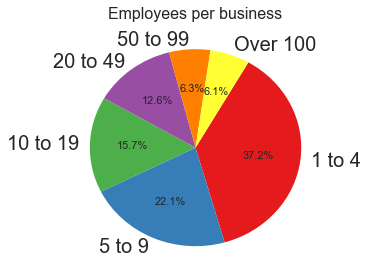

In [29]:
## Group by headcount
total_employees = len(df_corr['headcount'].dropna())
grp1 = len(df_corr[(df_corr['headcount'] == '1 to 4')]['headcount'].dropna())
grp2 = len(df_corr[(df_corr['headcount'] == '5 to 9')]['headcount'].dropna())
grp3 = len(df_corr[(df_corr['headcount'] == '10 to 19')]['headcount'].dropna())
grp4 = len(df_corr[(df_corr['headcount'] == '20 to 49')]['headcount'].dropna())
grp5 = len(df_corr[(df_corr['headcount'] == '50 to 99')]['headcount'].dropna())
grp6 = len(df_corr[(df_corr['headcount'] == '100 to 249')]['headcount'].dropna())
grp7 = len(df_corr[(df_corr['headcount'] == '250 to 499')]['headcount'].dropna())
grp8 = len(df_corr[(df_corr['headcount'] == '500 to 999')]['headcount'].dropna())
grp9 = len(df_corr[(df_corr['headcount'] == 'Over 1,000')]['headcount'].dropna())
grp_higher = grp6+grp7+grp8+grp9

perctg = [grp1/total_employees, grp2/total_employees, grp3/total_employees, grp4/total_employees, grp5/total_employees, 
          grp6/total_employees, grp7/total_employees, grp8/total_employees, grp9/total_employees]
perctg_ = [grp1/total_employees, grp2/total_employees, grp3/total_employees, grp4/total_employees, grp5/total_employees, 
          grp_higher/total_employees]

labls = ['1 to 4', '5 to 9', '10 to 19', '20 to 49', '50 to 99', '100 to 249', '250 to 499', 
         '500 to 999', 'Over 1,000']
labls_ = ['1 to 4', '5 to 9', '10 to 19', '20 to 49', '50 to 99', 'Over 100']

cs = cm.Set1(np.arange(len(labls))/len(labls))

plt.clf()
mpl.rcParams['font.size'] = 11.
fig = plt.figure(figsize=(4,4))
plt.pie(perctg_, labels=labls_, autopct='%1.1f%%', counterclock=False, colors=cs, startangle=60, labeldistance=1.1)
plt.title('Employees per business', fontsize=16)
plt.tight_layout()
plt.show(fig)
#plt.savefig('./figs/headcount_fraction.png', bbox_inches='tight')

plt.close('all')
mpl.rcParams['font.size'] = 16.

In [30]:
## Category Code
grp_code = df_corr.groupby('category_code')['name'].count()
low_codes = grp_code.loc[grp_code <= 1].reset_index()
print(len(low_codes), 'business have only one company working in its field')

82 business have only one company working in its field


In [31]:
df_corr[(df_corr['category_code'] == '11113000')]['name']

968111    Sekisui S-Lec America Inc
Name: name, dtype: object

There are 82 different kind of business type that are not very popular, in fact there is only one company working in this field; for example, there is only one company working in the field of "Dry Pea and Bean Farming" (NAICS code 11113000).

In [46]:
# Retrieve the sector code from the first two digits of the category_code:
df_corr['sector_code'] = df_corr['category_code'].str[:2]

## Which sector is the one with less business?
freq_sectors = df_corr.groupby('sector_code')['name'].count().reset_index()
freq_sectors.sort_values(by='name', ascending=False, inplace=True)
print('The sector where most of the business are stablished, has the NAICS code:', 
      freq_sectors['sector_code'].values[0])
print('The sector with less stablished business has the NAICS code:', 
      freq_sectors['sector_code'].values[-1])

The sector where most of the business are stablished, has the NAICS code: 54
The sector with less stablished business has the NAICS code: 55


Most of the business in US are stablished in the sector 54 ("Professional, Scientific, and Technical Services") and the sector less represented by the business is sector 55 ("Management of Companies and Enterprises").

In [33]:
## Group by State:
freq_state = df_corr.groupby('state')['name'].count().reset_index()
freq_state.sort_values(by='name', ascending=False, inplace=True)
print('The State where most of the business are working on is:', freq_state['state'].values[0], 'having', 
      freq_state['name'].values[0], 'out of', freq_state.name.sum())
print('The State with less the business working on it is:', freq_state['state'].values[-1], 'having', 
      freq_state['name'].values[-1], 'out of', freq_state.name.sum())

The State where most of the business are working on is: CA having 122800 out of 999806
The State with less the business working on it is: VI having 1 out of 999806


122800 out of 999806 business (12.3%) are located in the State of CA, while the British Virgin Islands have only 1 out of 999806 business located there.

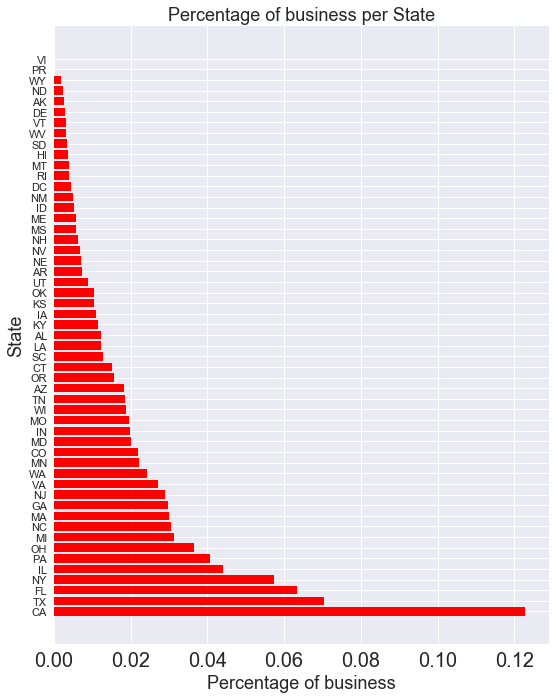

In [34]:
labels = freq_state['state'].values
y_pos = np.arange(len(labels))
n_business_state = freq_state['name'].values
percentage_business_state = freq_state['name'].values/freq_state.name.sum()

plt.clf()
fig = plt.figure(figsize=(8,10))
plt.barh(y_pos, percentage_business_state, align='center', color='red')
plt.title('Percentage of business per State', fontsize=18)
plt.xlabel('Percentage of business', fontsize=18)
plt.ylabel('State', fontsize=18)
plt.yticks(y_pos, labels, fontsize=11)
plt.tight_layout()
plt.show(fig)
#plt.savefig('./figs/state_business_fraction.png', bbox_inches='tight')
plt.close('all')

In [35]:
## Group by address
freq_adrs = df_corr.groupby(['address','state']).count().dropna().reset_index()
freq_adrs.sort_values(by='name', ascending=False, inplace=True)
most_shared_addrs = freq_adrs[(freq_adrs['name'] > 1.)][['address', 'state']].values[0]

print('The most shared address is:', most_shared_addrs, '(', 
      freq_adrs[(freq_adrs['name'] > 1.)]['name'].values[0], 'times)')

df_corr[(df_corr['address']=='1 S DEARBORN ST') & (df_corr['state']=='IL')][['address','city','state','name']].head(10)

The most shared address is: ['1 S DEARBORN ST' 'IL'] ( 76 times)


,address,city,state,name
1039,1 S DEARBORN ST,CHICAGO,IL,GENIE CO OF FAIRVIEW PARK INC
25619,1 S DEARBORN ST,CHICAGO,IL,Grabers Pottery
30645,1 S DEARBORN ST,CHICAGO,IL,ALEXANDER PROPERTIES INC.
31682,1 S DEARBORN ST,CHICAGO,IL,Rivercity Screenprinting
38058,1 S DEARBORN ST,CHICAGO,IL,Suncook River Veterinary Clinic
88529,1 S DEARBORN ST,CHICAGO,IL,JJ 2 DESIGN
96494,1 S DEARBORN ST,CHICAGO,IL,HIGHLANDS-CASHIERS HOSPITAL INC
106190,1 S DEARBORN ST,CHICAGO,IL,That Natural Store
113087,1 S DEARBORN ST,CHICAGO,IL,Brooks Insurance Agency Inc
135011,1 S DEARBORN ST,CHICAGO,IL,Bridgeport Catholic Academy


In [36]:
## Group by city
df_corr[(df_corr['city'] == 'ABERDEEN')].groupby(['city','state'])['name','zip'].count().dropna()

name  zip
city     state           
ABERDEEN ID        5    5
         MD       57   57
         MS       25   25
         NC       43   43
         NJ        4    4
         OH        2    2
         SD      145  145
         WA       67   67

In [37]:
## Group by business name
freq_names = df_corr.groupby('name').count().dropna().reset_index()
freq_names.sort_values(by='sector_code', ascending=False, inplace=True)
print('The business', freq_names.name.values[0], 'appears', freq_names.sector_code.values[0], 
      'times in different states')

df_corr[(df_corr['name'] == 'Farmers Insurance')][['name','state','zip','city']].dropna().reset_index().tail(3)

The business Farmers Insurance appears 820 times in different states


,index,name,state,zip,city
818,994845,Farmers Insurance,CA,91761,ONTARIO
819,996080,Farmers Insurance,CA,90270,MAYWOOD
820,996754,Farmers Insurance,TX,76065,MIDLOTHIAN


The business Farmers Insurance appears 820 times in different states

In [38]:
## Group by phone number
freq_phone = df_corr.groupby('phone').count().dropna().reset_index()
freq_phone.sort_values(by='name', ascending=False, inplace=True)
print('The phone number', freq_phone.phone.values[0], 'appears', freq_phone.sector_code.values[0], 
      "times, associated to different company's NAICS code")

df_corr[(df_corr['phone'] == '3037705531')][['phone','name','state','city','time_in_business']].dropna().reset_index().tail(3)

The phone number 3037705531 appears 88 times, associated to different company's NAICS code


,index,phone,name,state,city,time_in_business
78,983795,3037705531,Thor Solutions Inc,CA,DANA POINT,6-10 years
79,988766,3037705531,Crystal River Dialysis Center,MS,TERRY,10+ years
80,989256,3037705531,ROBIN O'CONNELL DESIGN,CA,MENLO PARK,10+ years


The phone number 3037705531 appears 88 times, associated to different company's NAICS code

In [39]:
## Group by zip code
freq_zip = df_corr.groupby('zip').count().dropna().reset_index()
freq_zip.sort_values(by='name', ascending=False, inplace=True)
print('The zip code', freq_zip.zip.values[0], 'appears', freq_zip.name.values[0], 
      "times, associated to different company's name")

df_corr[(df_corr['zip'] == '10001')][['zip','name','state','city']].dropna().reset_index().tail(3)

The zip code 10001 appears 1151 times, associated to different company's name


,index,zip,name,state,city
1148,995932,10001,DURABOTICS INC,NY,NEW YORK
1149,996104,10001,Cowen John Landscape Assocs LTD,NY,NEW YORK
1150,996586,10001,American Heritage Landmark Tours,NY,NEW YORK


The zip code 10001 appears 1151 times, associated to different company's name

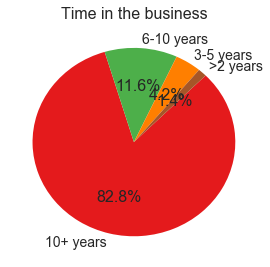

In [40]:
## Group by "time_in_business"
total_times = len(df_corr['time_in_business'].dropna())
grp1 = len(df_corr[(df_corr['time_in_business'] == '10+ years')]['time_in_business'].dropna())
grp2 = len(df_corr[(df_corr['time_in_business'] == '6-10 years')]['time_in_business'].dropna())
grp3 = len(df_corr[(df_corr['time_in_business'] == '3-5 years')]['time_in_business'].dropna())
grp4 = len(df_corr[(df_corr['time_in_business'] == '1-2 years')]['time_in_business'].dropna())
grp5 = len(df_corr[(df_corr['time_in_business'] == 'Less than a year')]['time_in_business'].dropna())
grp_higher = grp4+grp5

perctg_ = [grp1/total_times, grp2/total_times, grp3/total_times, grp_higher/total_times]
labls_ = ['10+ years', '6-10 years', '3-5 years', '>2 years']
cs = cm.Set1(np.arange(len(labls_))/len(labls_))

plt.clf()
mpl.rcParams['font.size'] = 16.
mpl.rc('xtick', labelsize=14.)
fig = plt.figure(figsize=(4,4))
plt.pie(perctg_, labels=labls_, autopct='%1.1f%%', counterclock=False, colors=cs, startangle=45, labeldistance=1.1)
plt.title('Time in the business', fontsize=16)
plt.tight_layout()
plt.show(fig)
#plt.savefig('./figs/longevity_fraction.png', bbox_inches='tight')

plt.close('all')
mpl.rc('xtick', labelsize=20.)

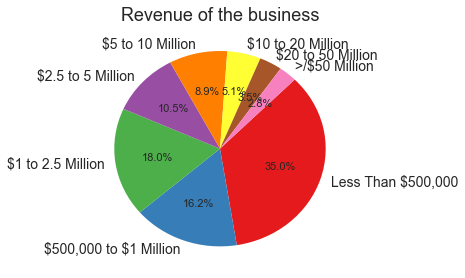

In [41]:
## Group by revenue
total_revenue = len(df_corr['revenue'].dropna())
grp1 = len(df_corr[(df_corr['revenue'] == 'Less Than $500,000')]['revenue'].dropna())
grp2 = len(df_corr[(df_corr['revenue'] == '$500,000 to $1 Million')]['revenue'].dropna())
grp3 = len(df_corr[(df_corr['revenue'] == '$1 to 2.5 Million')]['revenue'].dropna())
grp4 = len(df_corr[(df_corr['revenue'] == '$2.5 to 5 Million')]['revenue'].dropna())
grp5 = len(df_corr[(df_corr['revenue'] == '$5 to 10 Million')]['revenue'].dropna())
grp6 = len(df_corr[(df_corr['revenue'] == '$10 to 20 Million')]['revenue'].dropna())
grp7 = len(df_corr[(df_corr['revenue'] == '$20 to 50 Million')]['revenue'].dropna())
grp8 = len(df_corr[(df_corr['revenue'] == '$50 to 100 Million')]['revenue'].dropna())
grp9 = len(df_corr[(df_corr['revenue'] == '$100 to 500 Million')]['revenue'].dropna())
grp10 = len(df_corr[(df_corr['revenue'] == 'Over $500 Million')]['revenue'].dropna())
grp11 = len(df_corr[(df_corr['revenue'] == 'Over $1 Billion')]['revenue'].dropna())
grp_higher = grp11+grp10+grp9+grp8

perctg_ = [grp1/total_revenue, grp2/total_revenue, grp3/total_revenue, grp4/total_revenue, grp5/total_revenue, 
          grp6/total_revenue, grp7/total_revenue, grp_higher/total_revenue]
labls_ = ['Less Than \$500,000', '\$500,000 to \$1 Million', '$1 to 2.5 Million', '$2.5 to 5 Million', 
         '$5 to 10 Million', '$10 to 20 Million', '$20 to 50 Million', '>/$50 Million']
cs = cm.Set1(np.arange(len(labls_))/len(labls_))

plt.clf()
mpl.rcParams['font.size'] = 11.
mpl.rc('xtick', labelsize=14)
fig = plt.figure(figsize=(4,4))
plt.pie(perctg_, labels=labls_, autopct='%1.1f%%', counterclock=False, colors=cs, startangle=45, labeldistance=1.1)
plt.title('Revenue of the business', fontsize=18)
plt.tight_layout()
plt.show(fig)
#plt.savefig('./figs/revenue_fraction.png', bbox_inches='tight')

plt.close('all')
mpl.rcParams['font.size'] = 16.
mpl.rc('xtick', labelsize=20.)

In [42]:
highest_revenue = df_corr[(df_corr['revenue'] == 'Over $1 Billion')][['revenue','name','state','city','time_in_business']].dropna().reset_index()#.tail(3)
highest_revenue.groupby('time_in_business').count()

,index,revenue,name,state,city
time_in_business,,,,,
1-2 years,18,18,18,18,18
10+ years,1339,1339,1339,1339,1339
3-5 years,65,65,65,65,65
6-10 years,189,189,189,189,189


In [43]:
## Which companies have a revenue >$1 Billion, have been less than 2 years in the business and are located in CA?
highest_revenue[(highest_revenue['time_in_business']=='1-2 years') & (highest_revenue['state']=='CA')]['name'].values

array(['LIFETOUCH INC.', 'Mycon LLC', 'Southbay Cold Storage',
       'Travel Paltz Travel Center'], dtype=object)

'LIFETOUCH INC.', 'Mycon LLC', 'Southbay Cold Storage' and 'Travel Paltz Travel Center' are the 4 companies that have a revenue >$1 Billion, have been less than 2 years in the business and are located in CA.
